
Imported lazytransform v1.9. 

Imported featurewiz 0.5.4. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0. imbalanced=False,
        		ae_options={})
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


This Dataset has 100449 rows and 78 columns
Number of darknet move that has occured: 18080 Percent of occured darknet move: 18.0 %
Number of non-darknet move: 82369 Percent of non-darknet move 82.0 %
Total Length of Bwd Packet-Bwd Packet Length Min -0.00225
Flow Bytes/s-Fwd Seg Size Min 0.00354
Flow Bytes/s-Bwd Init Win Bytes -0.00433
Total Length of Bwd Packet-Flow IAT Min -0.00480
Total Length of Bwd Packet-Fwd IAT Min -0.00753
Total Length of Bwd Packet-Fwd IAT Max -0.00799
Flow Bytes/s-Flow IAT Min -0.00831
Total Length of Bwd Packet-Flow IAT Max -0.00873
FIN Flag Count-Bwd Init Win Bytes 0.00187
Fwd Packet Length Min-Idle Std 0.00412
Subflow Bwd Bytes-Fwd Act Data Pkts 0.00927
SYN Flag Count-Fwd Act Data Pkts -0.01354
Flow IAT Mean-Bwd Init Win Bytes -0.01428
Fwd Packet Length Min-Fwd Act Data Pkts -0.01432
Flow IAT Std-Average Packet Size 0.01542
Packet Length Min-Average Packet Size 0.01614
cechy wybrane przez rfe z najmniejszą korelacją:  ['Fwd IAT Max', 'Total Length of Bwd Pa

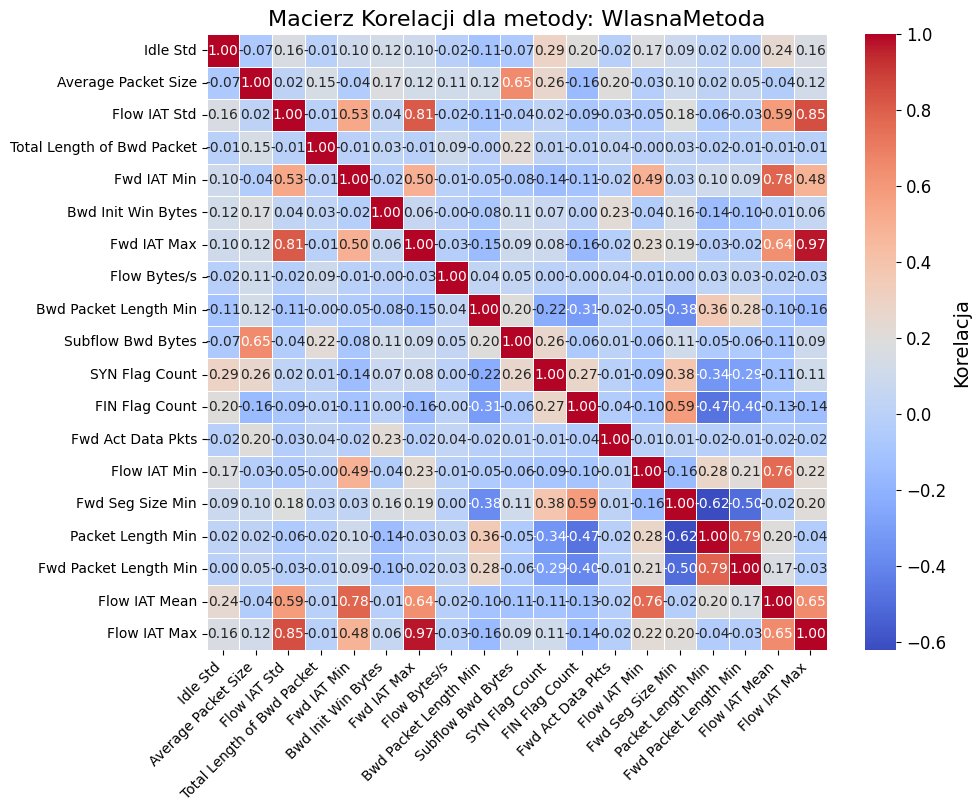

Number of features in learning model:  19
Selected features:  Index(['Idle Std', 'Average Packet Size', 'Flow IAT Std',
       'Total Length of Bwd Packet', 'Fwd IAT Min', 'Bwd Init Win Bytes',
       'Fwd IAT Max', 'Flow Bytes/s', 'Bwd Packet Length Min',
       'Subflow Bwd Bytes', 'SYN Flag Count', 'FIN Flag Count',
       'Fwd Act Data Pkts', 'Flow IAT Min', 'Fwd Seg Size Min',
       'Packet Length Min', 'Fwd Packet Length Min', 'Flow IAT Mean',
       'Flow IAT Max'],
      dtype='object')
---------------------------------------------------------------------------------
------------------------------Własna metoda selekcji cech------------------
---------------------------------------------------------------------------------
Number of features in learning model:  19
Selected features:  Index(['Idle Std', 'Average Packet Size', 'Flow IAT Std',
       'Total Length of Bwd Packet', 'Fwd IAT Min', 'Bwd Init Win Bytes',
       'Fwd IAT Max', 'Flow Bytes/s', 'Bwd Packet Length Min',
  

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 9/12 [01:32<00:28,  9.56s/it]

[LightGBM] [Info] Number of positive: 12609, number of negative: 57705
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3824
[LightGBM] [Info] Number of data points in the train set: 70314, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179324 -> initscore=-1.520933
[LightGBM] [Info] Start training from score -1.520933


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [02:02<00:00, 10.18s/it]

                                Accuracy  Balanced Accuracy  ROC AUC  \
Model                                                                  
XGBClassifier                    0.97030            0.94395  0.94395   
CatBoostClassifier               0.97037            0.94257  0.94257   
RandomForestClassifier           0.96645            0.94181  0.94181   
LGBMClassifier                   0.96765            0.94133  0.94133   
HistGradientBoostingClassifier   0.96542            0.93578  0.93578   
GradientBoostingClassifier       0.94870            0.90295  0.90295   
AdaBoostClassifier               0.92530            0.85110  0.85110   
LinearSVC                        0.87453            0.71348  0.71348   

                                F1 Score  Recall  Precision     MCC  \
Model                                                                 
XGBClassifier                    0.97012 0.97030    0.97003 0.89900   
CatBoostClassifier               0.97014 0.97037    0.97007 0.8990

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shap
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, SelectPercentile
from lazypredict.Supervised import LazyClassifier
from sklearnex import patch_sklearn
from featurewiz import featurewiz
from sklearn.feature_selection import RFE
patch_sklearn()
warnings.filterwarnings("ignore")


def find_lowest_correlation_pairs(X_features):
    # Oblicz macierz korelacji
    correlation_matrix = X_features.corr()

    # Przygotuj listę par cech i ich korelacji
    correlation_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            correlation_pairs.append((feature1, feature2, correlation))

    # Posortuj listę według wartości korelacji
    sorted_pairs = sorted(correlation_pairs, key=lambda x: abs(x[2]))

    # Wybierz 5 par z najniższą korelacją
    selected_pairs = sorted_pairs[:8]

    # Wypisz pary z wartościami korelacji
    for pair in selected_pairs:
        print(f"{pair[0]}-{pair[1]} {pair[2]:.5f}")

    # Zwróć unikalne nazwy cech
    unique_feature_names = set(pair[0] for pair in selected_pairs).union(pair[1] for pair in selected_pairs)
    return list(unique_feature_names)


def plot_correlation_matrix(features, method_name):
    correlation_matrix = features.corr()
    # Utwórz wykres heatmapy
    plt.figure(figsize=(10, 8))  # Zmniejsz rozmiar wykresu
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Korelacja'})
    # Dostosuj kolor i rozmiar tekstu na osiach x, y i osi kolorów (cbar)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10, rotation=45, ha='right')
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
    # Dostosuj kolor i rozmiar tekstu na osi kolorów (cbar)
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    # Zamiast cbar.set_ylabel, możemy skorzystać z tytułu osi kolorów
    cbar.set_label('Korelacja', fontsize=14)
    plt.title('Macierz Korelacji dla metody: ' + method_name, fontsize=16)
    folder_name = 'wykresyPDFMAL'  # Stała wartość folder_name
    os.makedirs(folder_name, exist_ok=True)
    # Zapisz wykres w folderze bez białego tła (transparent=True)
    plt.savefig(os.path.join(folder_name, f'{method_name}_wykres_korelacji_temp_PDFMAL.png'), transparent=True)
    plt.show()

def get_top_correlated_features(X_features, method_name, threshold=0.0, num_features=10):
    print()
    print()
    correlation_matrix = X_features.corr()
    correlation_pairs = []

    # Tworzymy pary cech wraz z wartościami bezwzględnymi korelacji
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], abs(correlation_matrix.iloc[i, j]))
            correlation_pairs.append(feature_pair)

    # Sortujemy pary cech według wartości bezwzględnych korelacji w malejącej kolejności
    correlation_pairs.sort(key=lambda x: x[2], reverse=True)

    # Wybieramy num_features najbardziej skorelowanych cech
    top_correlated_features = []
    i = 0
    while len(top_correlated_features) < num_features and i < len(correlation_pairs):
        feature_pair = correlation_pairs[i]
        if feature_pair[0] not in top_correlated_features and feature_pair[1] not in top_correlated_features:
            top_correlated_features.append(feature_pair[0])
            top_correlated_features.append(feature_pair[1])
        i += 1

    # Wyświetlamy najbardziej skorelowane cechy w żądanym formacie
    print(f"{num_features} najbardziej skorelowane cechy dla metody: {method_name}")
    for feature_pair in correlation_pairs[:num_features]:
        print(f"{feature_pair[0]} - {feature_pair[1]}: {feature_pair[2]:.5f}")

    return top_correlated_features[:num_features]



dataset =  pd.read_excel(r"C:/Users/earth/Desktop/PracaMagisterska_WitoldWluczkowski/ZbioryDanych/cicdarknet2020lab_clear.xlsx", index_col=0)

drop_columns = [ #Kolumny do usunięcia
        "Flow ID",    
        'Fwd Header Length.1',
        "Source IP", "Src IP",
        "Source Port", "Src Port",
        "Destination IP", "Dst IP",
        "Destination Port", "Dst Port",
        "Timestamp", "Label.1"
]
dataset.drop(columns=drop_columns, inplace=True, errors='ignore') # Usuwanie kolumn ze zbioru danych -Dropowanie kolumn, które są Stringami
dataset.drop_duplicates(inplace=True) #Usuwanie duplikatów
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.astype(float, errors='ignore') #Zmiana typów wszystkich kolumn na float ignorując errory
print("This Dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
dataset = dataset.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

for col in dataset.columns:
    dataset[col][dataset[col] < 0] = 0
malign = dataset[dataset['Label'] == 1]
benign = dataset[dataset['Label'] == 0]
print('Number of darknet move that has occured:', len(malign), "Percent of occured darknet move:", round((len(malign) / dataset.shape[0]) * 100, 2), '%')
print('Number of non-darknet move:', len(benign), "Percent of non-darknet move", round((len(benign) / dataset.shape[0]) * 100, 2), '%')

X = dataset.drop(['Label'], axis=1)
y = dataset['Label']
X = X.astype('float64')

# Wybór cech

rfe = RFE(estimator=RandomForestClassifier(max_depth=2), n_features_to_select=23)
selectkbest = SelectKBest(score_func=f_classif, k=23)

rfe.fit_transform(X, y)
cols_idxs_rfe = rfe.get_support(indices=True)
X_features_rfe = dataset.iloc[:, cols_idxs_rfe]
rfe_least_correlated = find_lowest_correlation_pairs(X_features_rfe)

# rfe_least_correlated = get_least_correlated_features(X_features_rfe, "RFE")
# selectkbest_least_correlated = get_least_correlated_features(X_features_selectkbest, "SelectKBest")

X = dataset.drop(['Label'], axis=1)
y = dataset['Label']
selectkbest.fit_transform(X, y)
cols_idxs_selectkbest = selectkbest.get_support(indices=True)
X_features_selectkbest = dataset.iloc[:, cols_idxs_selectkbest]
selectkbest_least_correlated = find_lowest_correlation_pairs(X_features_selectkbest)


print("cechy wybrane przez rfe z najmniejszą korelacją: ", rfe_least_correlated)
print("cechy wybrane przez selectkbest z najmniejszą korelacją: ", selectkbest_least_correlated)

def find_unique_features(feature_lists):
    # Utwórz listę cech
    all_features = [feature for features in feature_lists for feature in features]

    # Znajdź unikalne cechy
    unique_features = list(set(all_features))

    # Wybierz pierwsze 10 unikalnych cech
    selected_unique_features = unique_features[:19]

    return selected_unique_features
    
    
selected_unique_features = find_unique_features([rfe_least_correlated, selectkbest_least_correlated])
print("najnizsze korelacyjnie cechy: ", selected_unique_features)

X_features = dataset[selected_unique_features]
get_top_correlated_features(X_features, "WlasnaMetoda")
plot_correlation_matrix(X_features, "WlasnaMetoda")


X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, shuffle=True)
print("Number of features in learning model: ", X_train.shape[1])
print("Selected features: ", X_features.columns)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("---------------------------------------------------------------------------------")
print("------------------------------Własna metoda selekcji cech""------------------")
print("---------------------------------------------------------------------------------")
print("Number of features in learning model: ", X_train.shape[1])
print("Selected features: ", X_features.columns)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_std, X_test_std, y_train, y_test)
print(models)